### Sazonalidade Dolar intra-mensal

Análise de sazonalidade intra-mensal do dolar através dos preços médios diários apresentados ao longo dos últimos 5 anos.

In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

Os dados importados do arquivo `DOL-Daily.csv` abaixo, foram obtivos através da ferramenta Meta Trader 5.  
Valores estes que representam os candles diários do dolar (código `DOLFUT`).

In [2]:
# carrega dados
df = pd.read_csv("DOL-Daily.csv", header=None, parse_dates=[0], index_col=0)
df.columns = ["open", "high", "low", "close"]
df.index.name = "date"

Histórico de preço disponibilizado pela plataforma MT5:

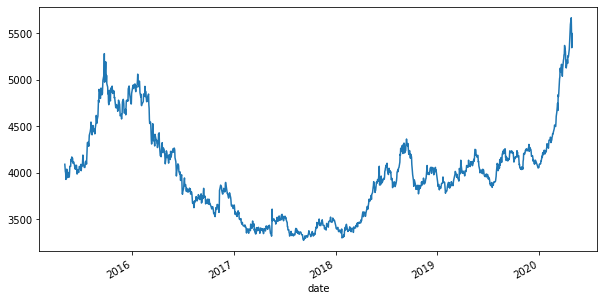

In [4]:
# histórico original
df["close"].plot(figsize=(10, 5))
plt.show()

In [5]:
# cria dias sequenciais de todo o período do ano (365 dias) evitando gaps
dfD = pd.DataFrame(pd.date_range(start=min(df.index), end=max(df.index), freq='D'))
dfD.columns = ['date']
dfD = dfD.set_index('date')

In [6]:
# faz junção com os dados originais
dfD = dfD.join(df["close"])

In [7]:
# preeche todos os dias vazios com o valor prévio
dfD = dfD.fillna(method='ffill')

Histórico sem GAPs (os dias dos finais de semana e feriados contém os valores prévios):

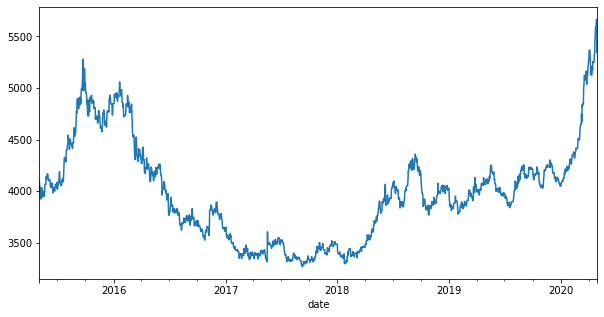

In [8]:
# histórico novo
dfD["close"].plot(figsize=(10, 5))
plt.show()

Calcula mudança percentual no valor do dólar entre os dias

In [9]:
# calcula mudança percentual dos valores diários
dfD["change"] = dfD["close"].pct_change()

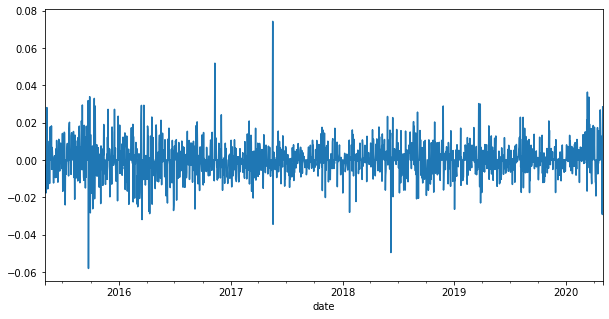

In [10]:
# histórico de mudança percentual diária
dfD["change"].plot(figsize=(10, 5))
plt.show()

Calcula média da oscilação percentual por dia do mês.

In [11]:
# calcula média do preço por "dia do mês"
dfD = dfD[["change"]].groupby(dfD.index.day).mean()

# apresenta diferença entre primeiro e último dia (1 vs. 364)
dfD.iloc[[0, -1]]

,change
date,
1,0.000611
31,0.000209


Apresenta gráfico dasvariações médias calculadas:

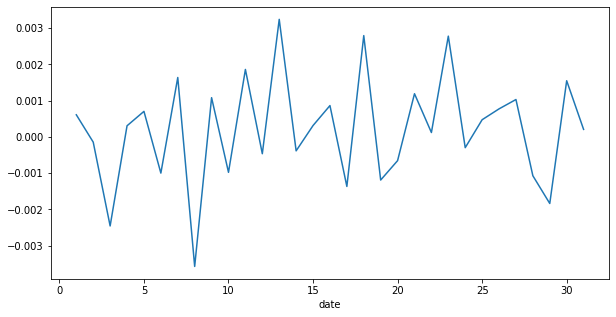

In [14]:
# variações por 'dia do mês' - sazonalidade
dfD["change"].plot(figsize=(10, 5))

plt.show()

Apresenta gráfico acumulativo das variações médias calculadas:

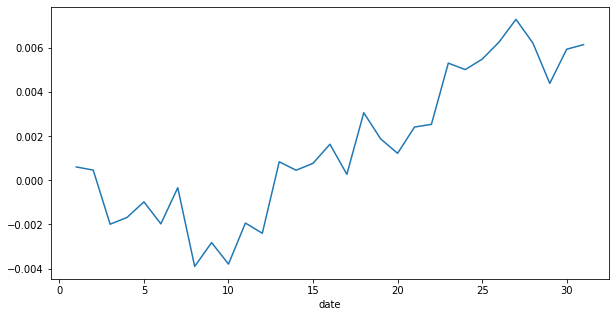

In [12]:
# soma acumulativa das variações por 'dia do mês' - sazonalidade
dfD["change"].cumsum().plot(figsize=(10, 5))

plt.show()